# Inserting Libraries

In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Reading Data

In [93]:
df = pd.read_csv('dataset.csv')

# Data Insights

## data Shape

In [94]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


## Features Info

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

## The unique values in non-integer features

In [96]:
for x in ["type of meal", "car parking space", "room type", "market segment type", "booking status"]:
    print(x + ":", df[x].unique())
    print("-" * 100)

type of meal: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------------------------------------------------------------------------------------------
car parking space: [0 1]
----------------------------------------------------------------------------------------------------
room type: ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
----------------------------------------------------------------------------------------------------
market segment type: ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
----------------------------------------------------------------------------------------------------
booking status: ['Not_Canceled' 'Canceled']
----------------------------------------------------------------------------------------------------


## Features Description

1. **Booking_ID**: A unique identifier for each booking. (Costing Feature)
2. **Number of adults**: The number of adults included in the booking.
3. **Number of children**: The number of children included in the booking.
4. **Number of weekend nights**: The number of weekend nights (Friday and Saturday) included in the booking.
5. **Number of week nights**: The number of weeknights (Sunday to Thursday) included in the booking.
6. **Type of meal**: The type of meal plan chosen for the booking. (plan 1/2/3)
7. **Car parking space**: Car parking space requested or not.
8. **Room type**: The type of room booked. (type [1 - 7])
9. **Lead time**: The number of days between the booking date and the check-in date.
10. **Market segment type**: The market segment from which the booking originated, such as ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'].
11. **Repeated**: Indicator of whether the booking is from a repeat guest.
12. **P-C**: The number of previous booking cancellation.
13. **P-not-C**: The number of previous non-cancellations.
14. **Average price**: The average price per night for the booking.
15. **Special requests**: The number of special requests made by the guest for the booking.
16. **Date of reservation**: The date when the reservation was made.
17. **Booking status**: The current status of the booking, such as ['Not_Canceled' 'Canceled'].

## Data Statistics

In [97]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Number of duplicates

In [98]:
print("Number of duplicates =", df.duplicated().sum())

Number of duplicates = 0


## summary
**The dataset have:**
- No Nulls.
- No Duplicates.
- Costing features which should be removed: (Booking_ID).
- Features should be encoded: (type of meal, room type, market segment type, booking status).
- new features: (family_size, total_nights, reservation_year, reservation_month, reservation_day)

# Data Preprocessing

## Removing Costing Features

In [99]:
def drop_costing_features(df):
    df.drop('Booking_ID', axis = 1, inplace = True)

## Encoding

- Features (**type of meal, room type**) have ordered values, so Ordinal Encoding encoding should be used.
- **market segment type** feature has unordered values, so label encoding should be used.
- **booking status** should be encoded using binary encoding

In [100]:
def Encoding(df):
    df['type_of_meal_encoded'] = [0 if x == 'Not Selected' else int( x.replace('Meal Plan ', '')) for x in df['type of meal']]
    df['room_type_encoded'] = [int( x.replace('Room_Type ', '')) for x in df['room type']]
    df['market_segment_type_encoded'] = LabelEncoder().fit_transform(df['market segment type'])
    df['booking_status_encoded'] = [1 if x == 'Canceled' else 0 for x in df['booking status']]

## Feature Engineering (Adding New Features)

In [101]:
def new_features(df):
    df['family_size'] = df['number of adults'] + df['number of children']
    df['total_nights'] = df['number of week nights'] + df['number of weekend nights']
    df['date_new_form'] = [[2, 29, 2018] if date == '2018-2-29' else date.split(sep='/') if '/' in date else date.split(sep='-') for date in df['date of reservation']]
    df['reservation_day'] = [int(x[1]) for x in df['date_new_form']]
    df['reservation_month'] = [int(x[0]) for x in df['date_new_form']]
    df['reservation_year'] = [int(x[2]) for x in df['date_new_form']]
    df.drop(['date_new_form', 'date of reservation'], axis=1, inplace=True)

## Preprocessing Function

In [102]:
def preprocessing(df):
    drop_costing_features(df)
    Encoding(df)
    new_features(df)

preprocessing(df)

# Data Visualization

## Features Distribution

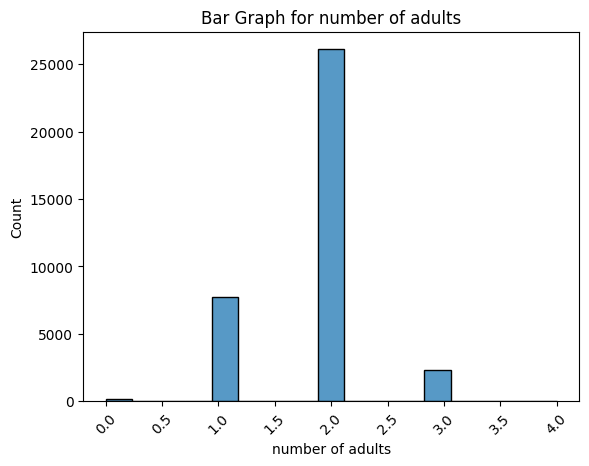

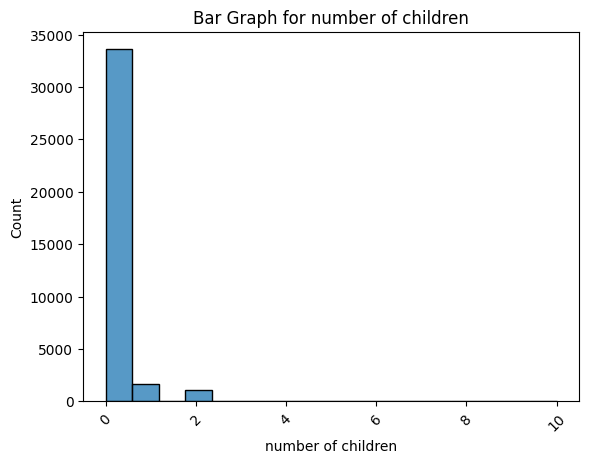

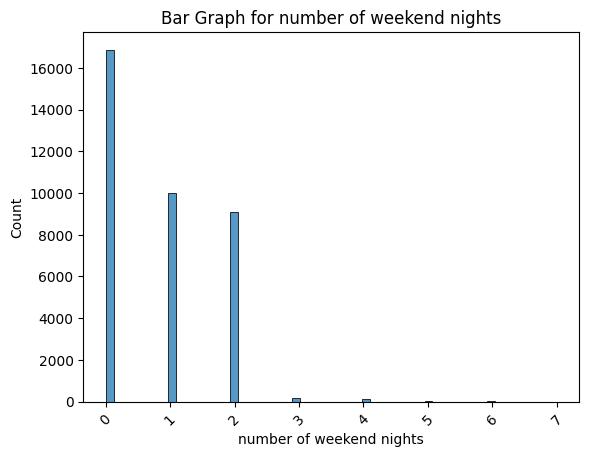

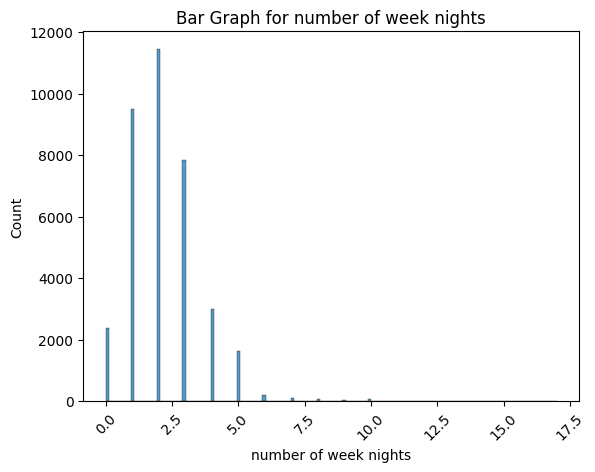

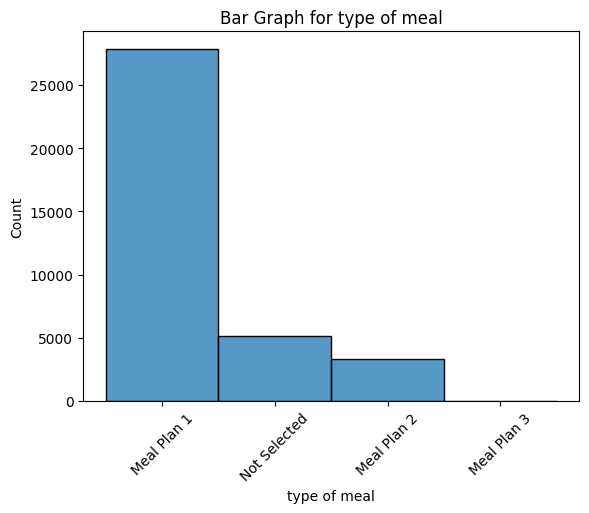

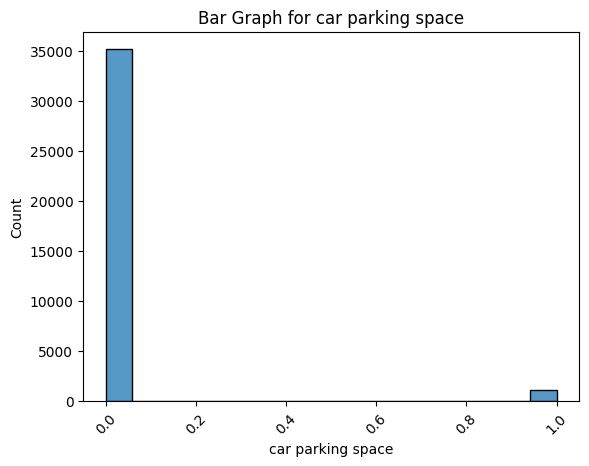

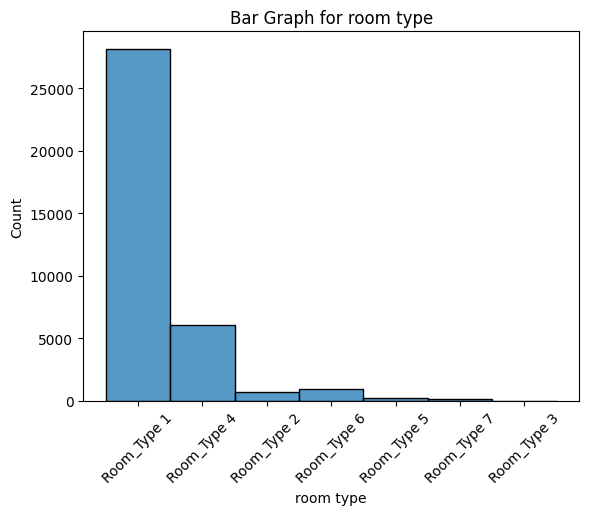

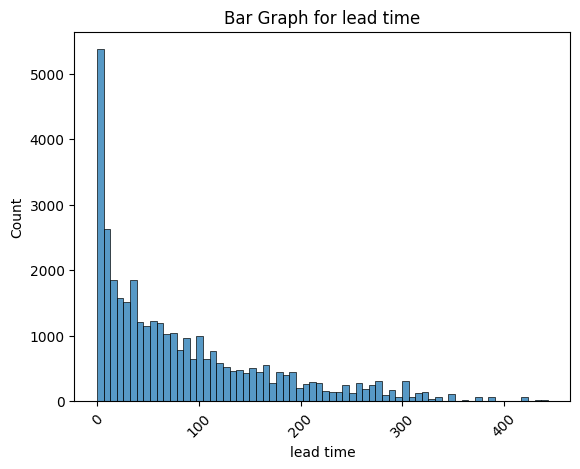

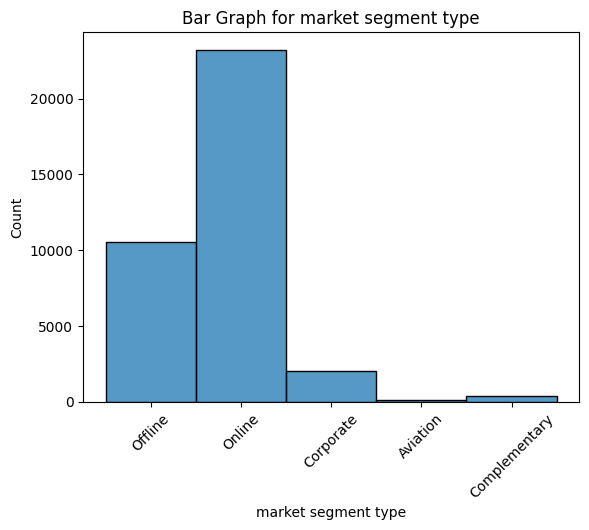

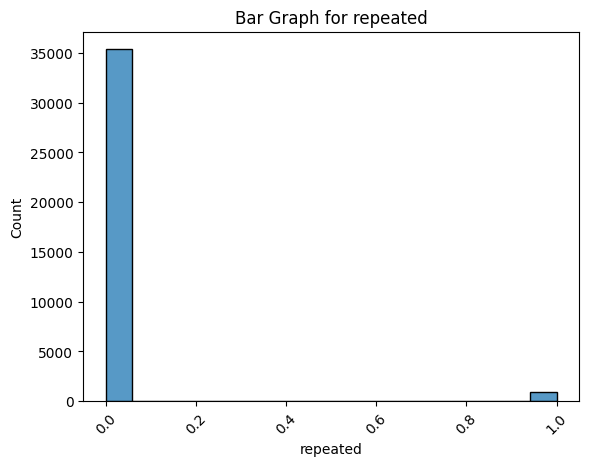

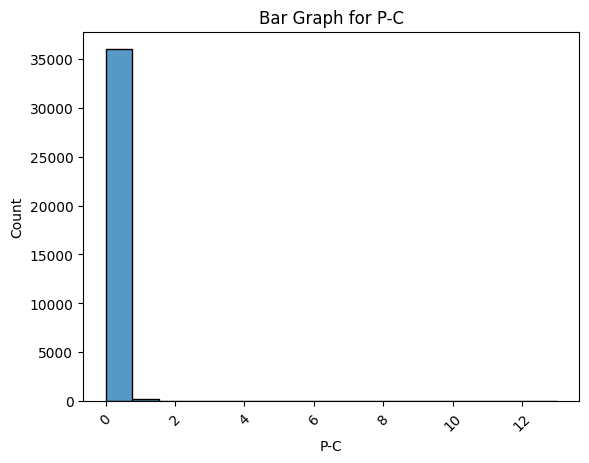

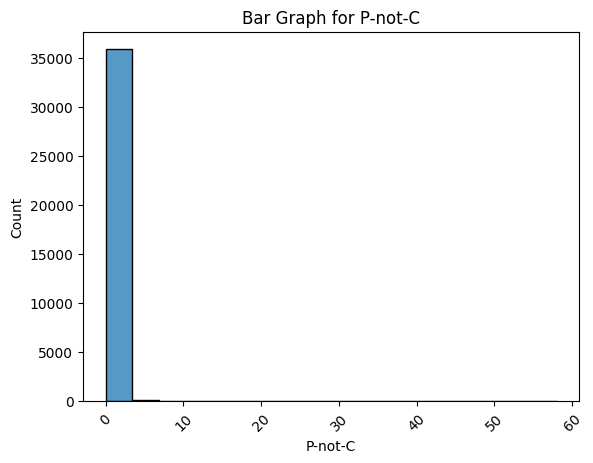

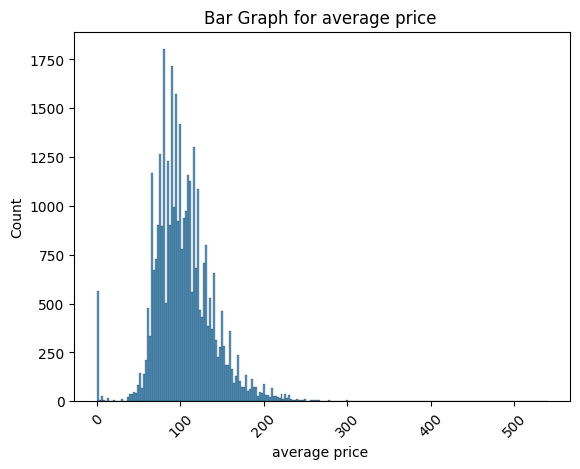

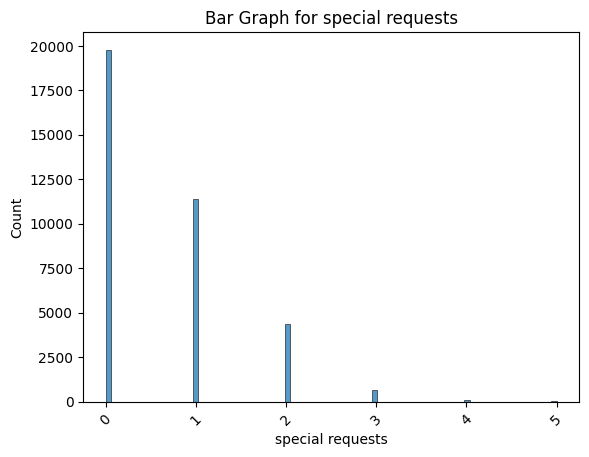

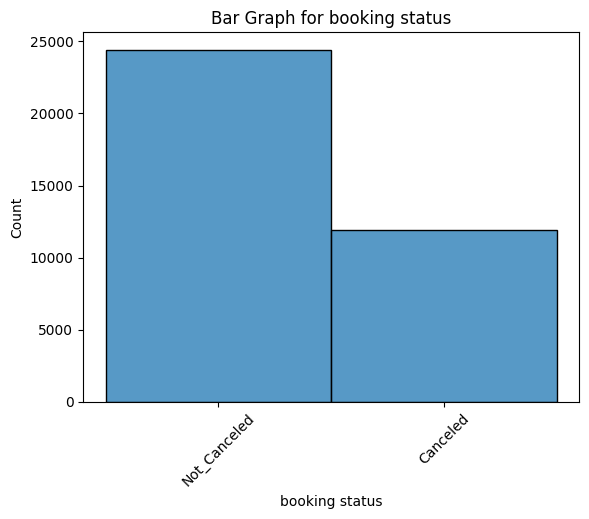

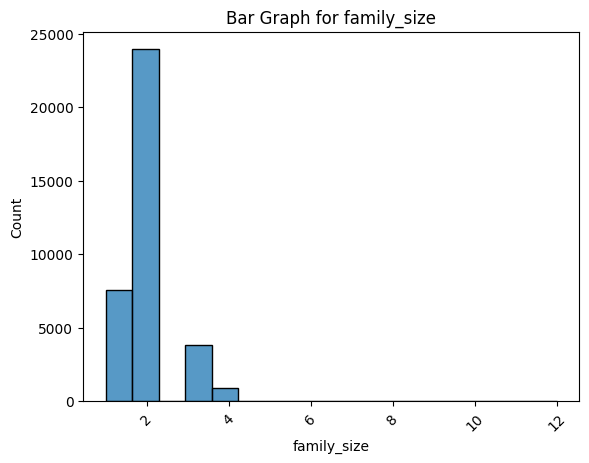

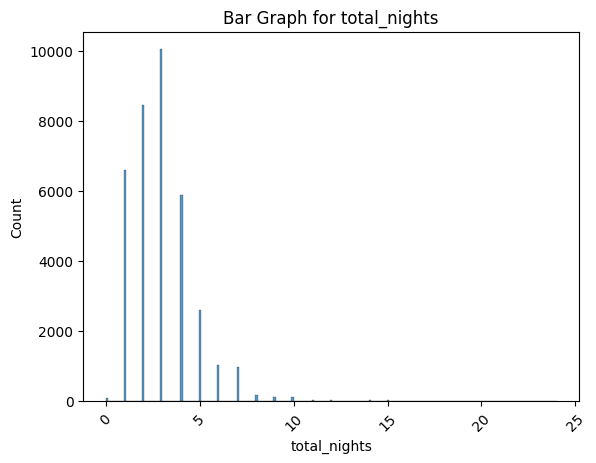

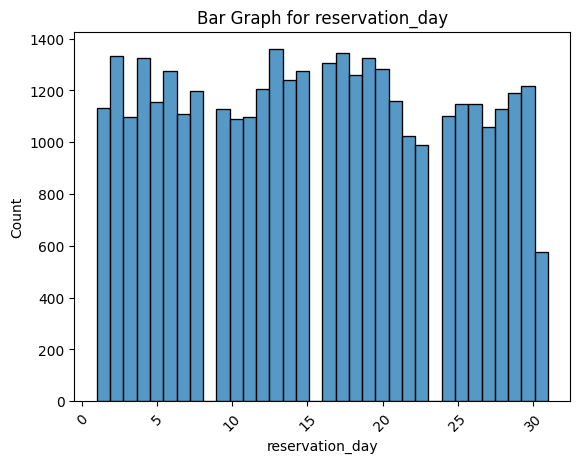

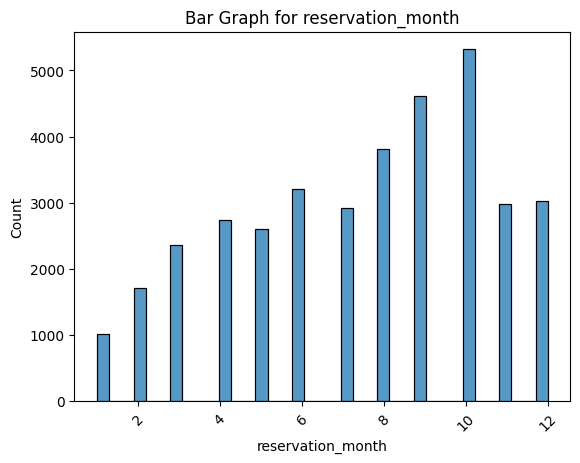

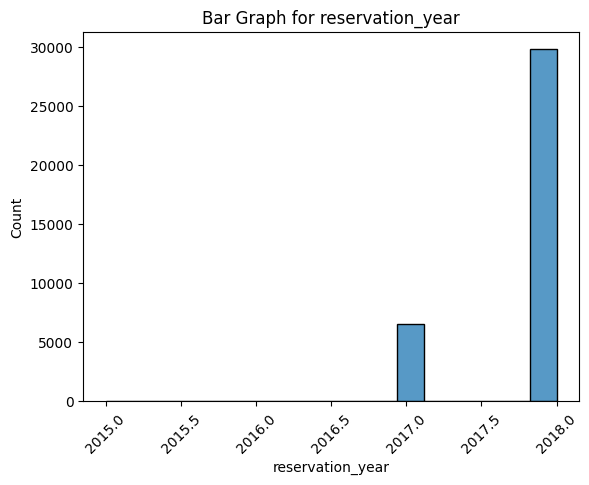

In [103]:
for column in df.columns:
    if "encoded" in column:
        continue
    plt.figure()
    sns.histplot(df[column])
    plt.title("Bar Graph for " + column)
    plt.xlabel(column)
    plt.xticks(rotation = 45)
    plt.ylabel('Count')
    plt.show()

**Summary:**

- **Number of Adults**: Most common is 2 adults, followed by 1.
- **Number of Children**: Majority have 0 children. Small numbers have 1 or 2 children, with very few having 3 or more.
- **Number of Weekend Nights**: Most common entries are 0, 1, or 2 weekend nights. Very few entries have 3 or more.
- **Number of Week Nights**: Majority of occurrences around 2.5 week nights, with fewer entries as the number of week nights increases.
- **Type of Meal**: "Meal Plan 1" is the most common, followed by "Not Selected," "Meal Plan 2," and "Meal Plan 3."
- **Car Parking Space**: Most entries have no car parking space.
- **room type**: most common is 1, followed by 4.
- **Lead Time**: Majority of reservations have shorter lead times.
- **Market Segment Type**: Online segment is the most common, followed by Offline.
- **Repeated**: Vast majority of entries are not repeated.
- **P-C**: Majority of data points are concentrated at the value 0.
- **P-not-C**: Similarly, the majority of data points are concentrated at the value 0.
- **Average Price**: Majority of entries have lower average prices (Mean = 103).
- **Special Requests**: Majority have 0 or 1 special request. Higher numbers of special requests are less common.
- **Booking Status**: Most bookings are not canceled.
- **Family Size**: Majority is 4 or less.
- **total nights**: Majority is 5 or less.
- **reservation day**: the entries are distributed through the days
- **reservation month**: most entries reserved in (august, september, october).
- **reservation year**: Most common is 2018, followed by 2017.


## Correlation between features and target

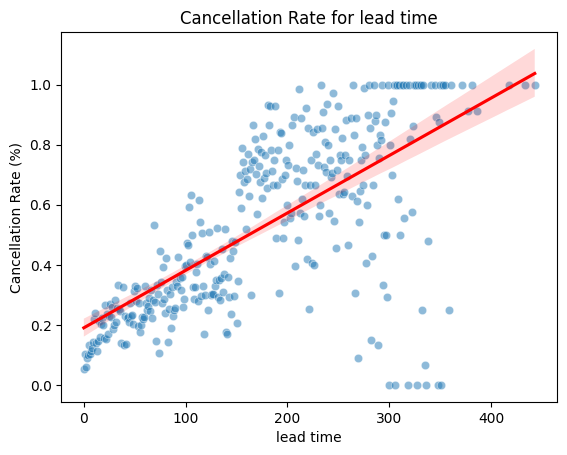

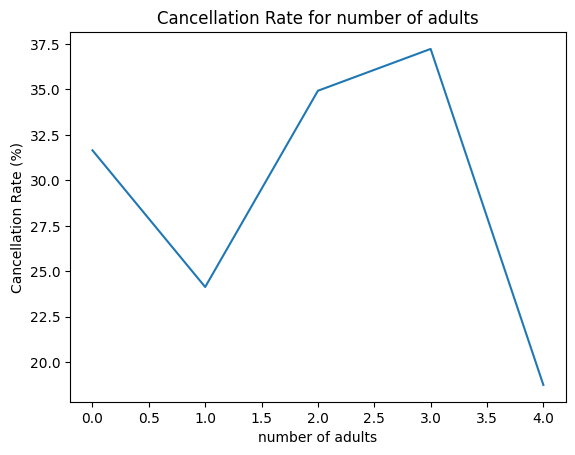

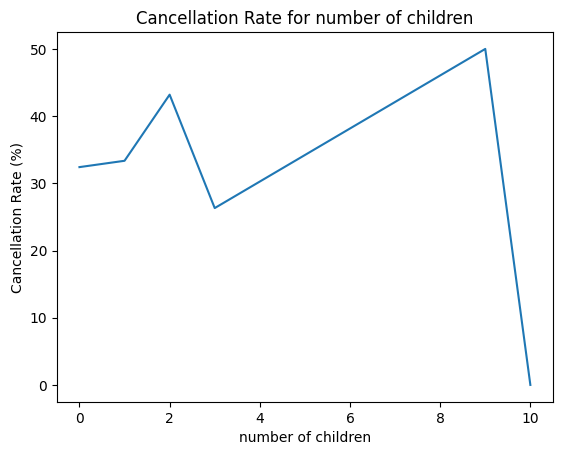

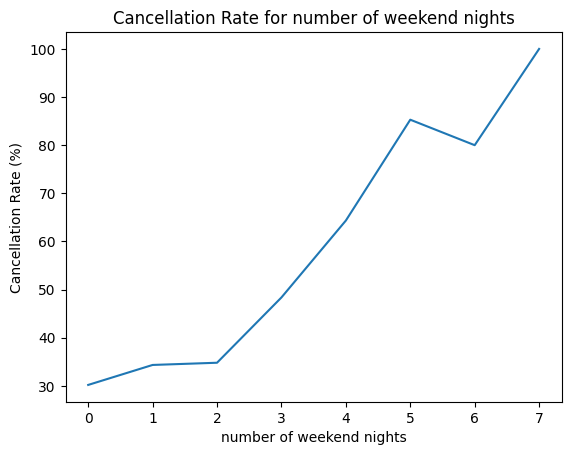

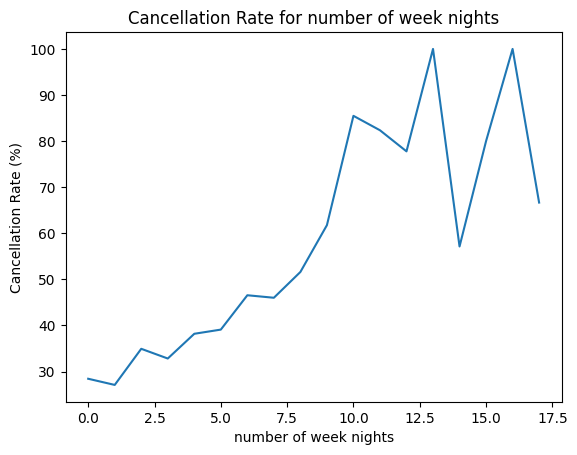

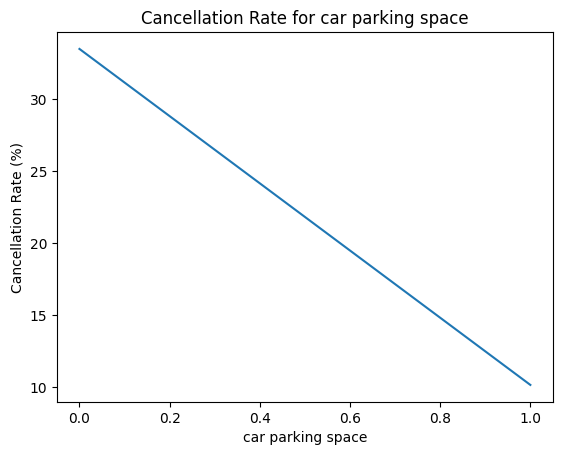

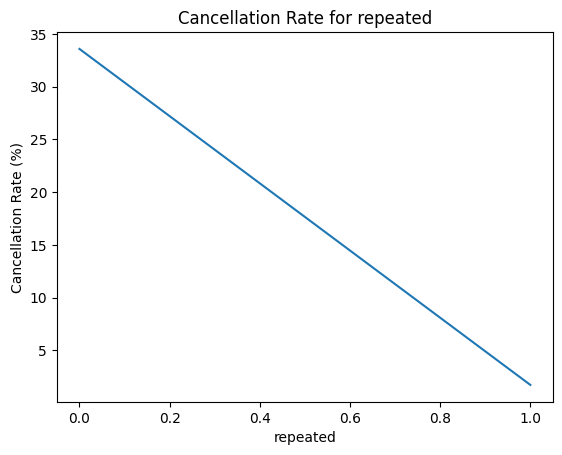

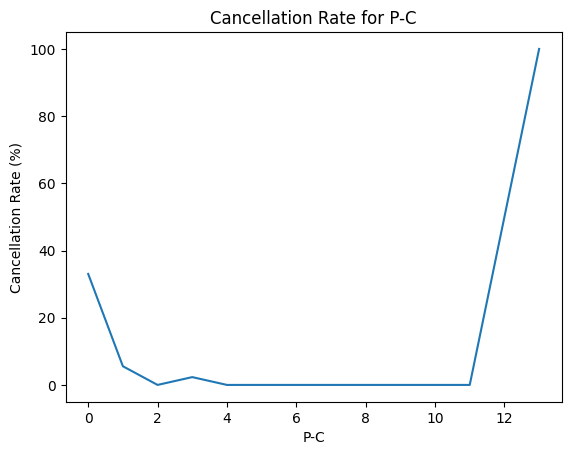

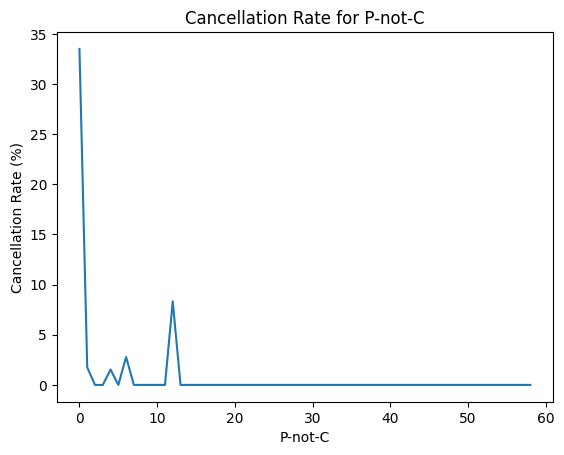

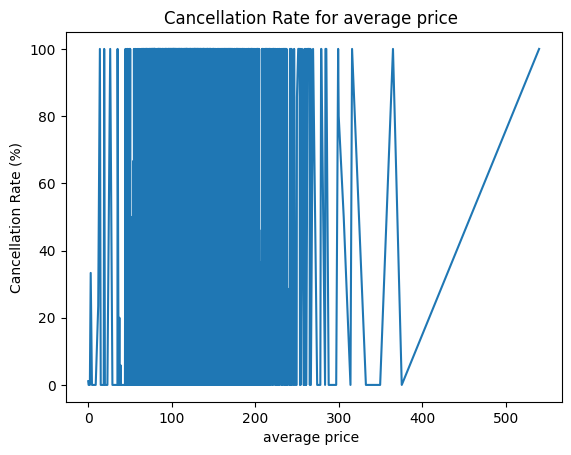

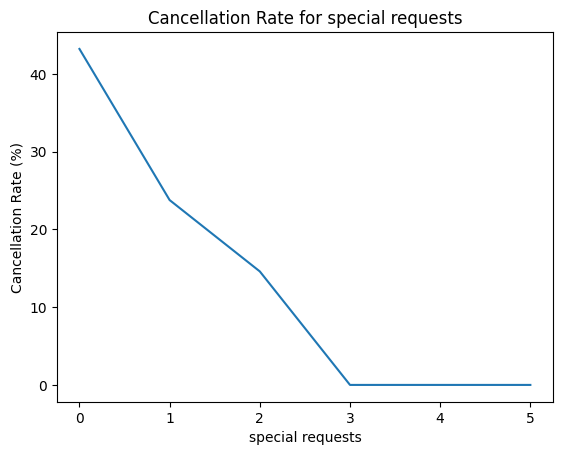

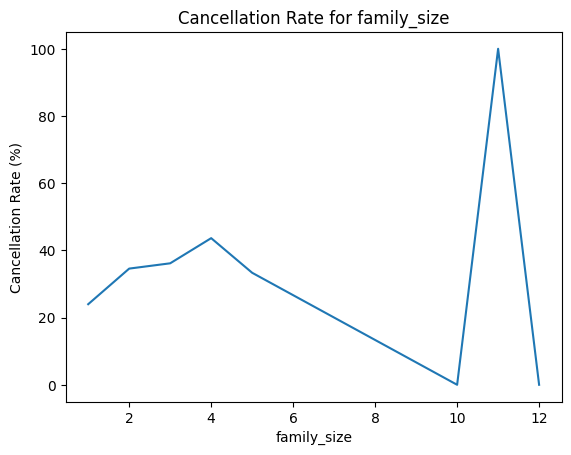

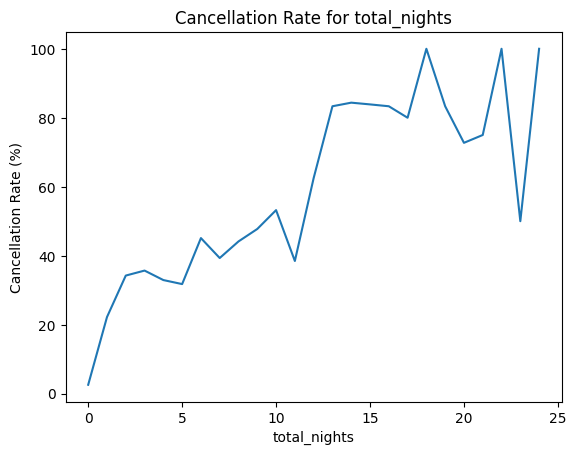

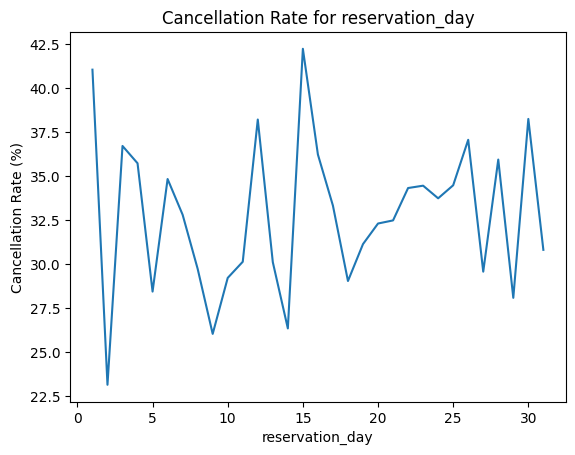

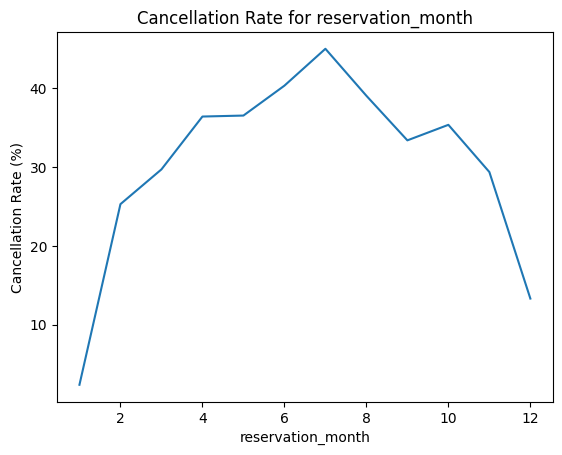

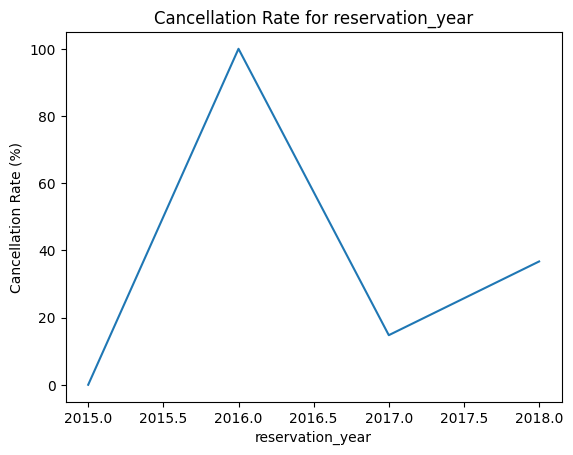

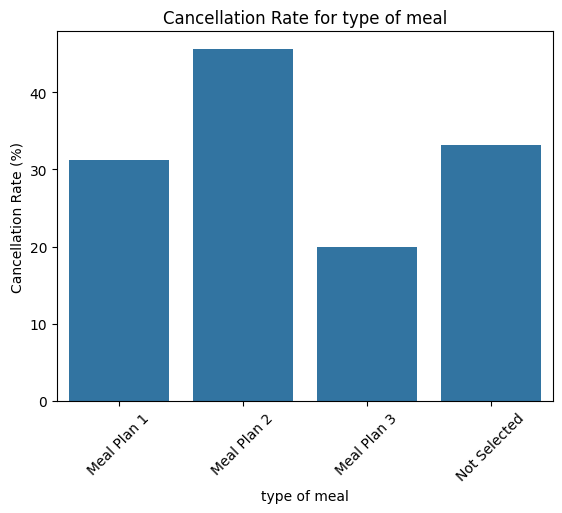

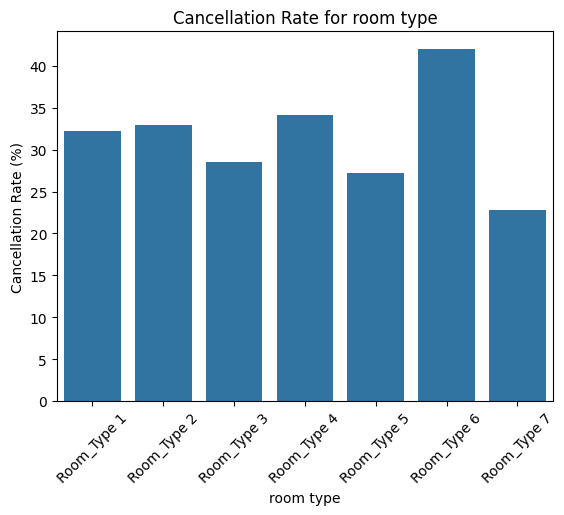

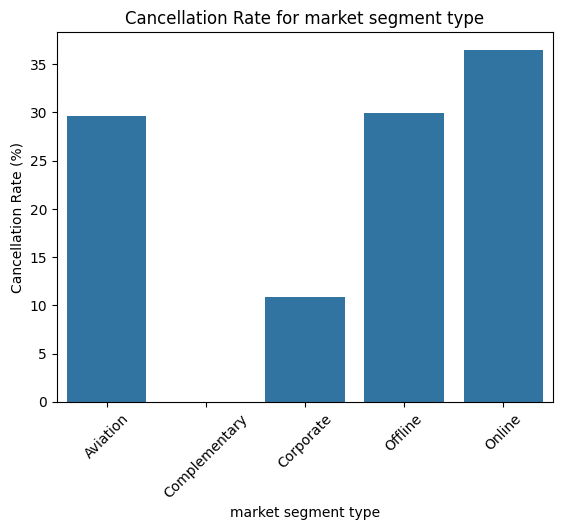

In [104]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()

df_grouped = df.groupby('lead time')['booking_status_encoded'].mean().reset_index()
plt.figure()
sns.scatterplot(x=df_grouped['lead time'], y=df_grouped['booking_status_encoded'], alpha=0.5)
sns.regplot(x=df_grouped['lead time'], y=df_grouped['booking_status_encoded'], scatter=False, color='red')
plt.title(f"Cancellation Rate for lead time")
plt.xlabel("lead time")
plt.ylabel('Cancellation Rate (%)')
plt.show()

for column in numerical_columns:
    if "encoded" in column or column == "lead time":
        continue
    df_grouped = df.groupby(column)['booking_status_encoded'].mean().reset_index()
    plt.figure()
    sns.lineplot(x=df_grouped[column], y=df_grouped['booking_status_encoded'] * 100)
    plt.title(f"Cancellation Rate for {column}")
    plt.xlabel(column)
    plt.ylabel('Cancellation Rate (%)')
    plt.show()

for column in categorical_columns:
    if column == "booking status":
        continue
    df_grouped = df.groupby(column)['booking_status_encoded'].mean().reset_index()
    plt.figure()
    sns.barplot(x=df_grouped[column], y=df_grouped['booking_status_encoded'] * 100)
    plt.title(f"Cancellation Rate for {column}")
    plt.xlabel(column)
    plt.xticks(rotation = 45)
    plt.ylabel('Cancellation Rate (%)')
    plt.show()

**The relationship summary between features and target:**

- **Number of Adults**: Cancellation rates are higher for groups of 0, 2, and 3 adults.
- **Number of Children**: More than 4 children result in a higher cancellation rate.
- **Number of Weekend Nights**: More weekend nights result in a higher cancellation rate.
- **Number of Week Nights**: Fewer than 10 weeknights result in a higher cancellation rate.
- **Type of Meal**: Meal plan 2 has the highest cancellation rate.
- **Car Parking Space**: Reservations without parking space have a higher likelihood of cancellation.
- **Room Type**: Room type 6 has the highest cancellation rate.
- **Lead Time**: Higher lead time means higher cancellation rate.
- **Market Segment Type**: The online segment has the highest cancellation rate, while the complementary segment rarely cancels.
- **Repeated**: Repeated bookings are less likely to cancel.
- **P-C**: 
	- from 0 to 2, cancellation rate decreases. 
	- Values above 10 mostly result in cancellations.
- **P-not-C**: Value of 0 has a high cancellation rate.
- **Average Price**: No obvious relationship with the cancellation rate.
- **Special Requests**: More special requests result in a lower cancellation rate.
- **Family Size**: 
  - Below 4: Higher family size results in a higher cancellation rate.
  - Below 10: Higher family size results in a lower cancellation rate.
  - Above 10: High cancellation rate.
- **Total Nights**: A higher number of total nights result in a higher cancellation rate.
- **Reservation Day**: No obvious relationship.
- **Reservation Month**: Cancellation rate increases during the first 7 months and then decreases.
- **Reservation Year**: Increases between 2015-2016, decreases between 2016-2017, and then increases again.

**Note: The data distribution is imbalanced, so some relationships may not be accurate.**

# Data Preparation

## Dropping Encoded Features 

In [105]:
def drop_encoded_features(df):
    df.drop(['type of meal', 'room type', 'market segment type', 'booking status'], axis=1, inplace=True)

drop_encoded_features(df)

## Scaling

In [106]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [107]:
normalized_df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,type_of_meal_encoded,room_type_encoded,market_segment_type_encoded,booking_status_encoded,family_size,total_nights,reservation_day,reservation_month,reservation_year
count,3.628500e+04,3.628500e+04,36285.000000,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04,3.628500e+04
mean,-1.406007e-16,-3.348568e-17,0.000000,-1.131855e-16,-3.759796e-17,1.684075e-17,-1.664493e-17,-9.595313e-18,2.996088e-17,4.343348e-16,1.684075e-17,2.075721e-17,-8.302883e-17,-2.126635e-16,1.253265e-17,-4.503923e-17,-8.028731e-17,1.018278e-16,-1.092201e-16,-1.418031e-14
std,1.000014e+00,1.000014e+00,1.000014,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.555935e+00,-2.616355e-01,-0.931212,-1.562521e+00,-1.787938e-01,-9.918806e-01,-1.621870e-01,-6.338450e-02,-8.744431e-02,-2.947662e+00,-7.882118e-01,-1.978232e+00,-5.064079e-01,-5.212902e+00,-6.980931e-01,-1.461055e+00,-1.688319e+00,-1.670064e+00,-2.092520e+00,-7.339943e+00
25%,2.990725e-01,-2.616355e-01,-0.931212,-8.537670e-01,-1.787938e-01,-7.940627e-01,-1.621870e-01,-6.338450e-02,-8.744431e-02,-6.589992e-01,-7.882118e-01,1.042232e-01,-5.064079e-01,-8.107170e-01,-6.980931e-01,7.657424e-02,-5.684825e-01,-8.691668e-01,-7.895427e-01,4.677211e-01
50%,2.990725e-01,-2.616355e-01,0.217450,-1.450128e-01,-1.787938e-01,-3.286088e-01,-1.621870e-01,-6.338450e-02,-8.744431e-02,-1.131972e-01,-7.882118e-01,1.042232e-01,-5.064079e-01,6.566779e-01,-6.980931e-01,7.657424e-02,-8.564272e-03,4.614392e-02,1.876901e-01,4.677211e-01
75%,2.990725e-01,-2.616355e-01,1.366111,5.637413e-01,-1.787938e-01,4.742993e-01,-1.621870e-01,-6.338450e-02,-8.744431e-02,4.725067e-01,4.836460e-01,1.042232e-01,-5.064079e-01,6.566779e-01,1.432474e+00,7.657424e-02,5.513540e-01,8.470408e-01,8.391786e-01,4.677211e-01
max,4.154081e+00,2.457081e+01,7.109419,1.048630e+01,5.593034e+00,4.163022e+00,6.165722e+00,3.523625e+01,3.298159e+01,1.244310e+01,5.571077e+00,4.269135e+00,3.779975e+00,6.566779e-01,1.432474e+00,1.545287e+01,1.174972e+01,1.762351e+00,1.490667e+00,4.677211e-01


## Outliers

### Percentage of Outliers 

In [108]:
#abs(z-score) > 3 -> Outlier
print("Percentage of Outliers:- ")
for column in normalized_df.columns:
    outlier_number = normalized_df[abs(normalized_df[column]) > 3].shape[0]
    percent = outlier_number /  normalized_df.shape[0] * 100
    print(column + ":", "{:.2f}".format(percent) + "%")


Percentage of Outliers:- 
number of adults: 0.43%
number of children: 2.98%
number of weekend nights: 0.51%
number of week nights: 0.89%
car parking space: 3.10%
lead time: 1.04%
repeated: 2.56%
P-C: 0.39%
P-not-C: 0.74%
average price : 0.98%
special requests: 2.10%
type_of_meal_encoded: 0.01%
room_type_encoded: 3.10%
market_segment_type_encoded: 1.42%
booking_status_encoded: 0.00%
family_size: 2.56%
total_nights: 1.11%
reservation_day: 0.00%
reservation_month: 0.00%
reservation_year: 0.01%


`Outliers are very small percent which can be dropped`

### Removing Outliers

In [109]:
print("Data shape before dropping outliers", normalized_df.shape)

# Drop outliers based on z-score
for column in normalized_df.columns:
    normalized_df = normalized_df[abs(normalized_df[column]) <= 3]

print("Data shape after dropping outliers", normalized_df.shape)

Data shape before dropping outliers (36285, 20)
Data shape after dropping outliers (31354, 20)
